In [11]:
import pyforest
from matplotlib_venn import venn3, venn2

In [2]:
df_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/datasets/80train_20test/featurized/'
neks = ['NEK2_binding', 'NEK2_inhibition', 'NEK3_binding', 'NEK5_binding', 'NEK9_binding', 'NEK9_inhibition']
samplings = ['none_scaled','UNDER','SMOTE']

In [14]:
all_dfs = [] 
all_neks = []
for nek in neks: 
    full_df = pd.read_csv(f'{df_path}{nek}_MFP_none_scaled.csv') 
    full_df['NEK'] =nek
    all_dfs.append(full_df)
    all_neks.append(nek)
df_dict = {}
for df, nek in zip(all_dfs, all_neks):
    df_dict[nek] = df

full_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,NEK,compound_id,base_rdkit_smiles,subset,active,0,1,2,3,4,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,NEK9_inhibition,kdb_1014,Nc1nccc(-c2c(-c3ccc(F)cc3)ncn2C2CCNCC2)n1,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NEK9_inhibition,kdb_1153,Cn1cc(C=C2C(=O)Nc3cccnc32)c2ccccc21,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NEK9_inhibition,kdb_1618,COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1,train,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,NEK9_inhibition,kdb_2013,NC(=O)c1ccc(-c2nc(-c3ccccn3)c(-c3ccc4c(c3)OCO4...,test,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NEK9_inhibition,kdb_2200,c1ccc(Cc2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)cc1,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,NEK9_inhibition,kdb_3769,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc2c(n1)n1c(cc3cccc...,train,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389,NEK9_inhibition,kdb_3771,COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c...,train,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,NEK9_inhibition,kdb_3772,CCOc1cc(N2CCC(O)CC2)ccc1Nc1ncc2c(n1)n1c(cc3ccc...,test,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
391,NEK9_inhibition,kdb_3774,COc1cc(N2CCOCC2)ccc1Nc1ncc2c(n1)N1c3ccccc3CC1C...,train,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def common_unique_values(list1, list2, *lists):
    sets = [set(list1), set(list2)]
    for lst in lists:
        sets.append(set(lst))
    return set.intersection(*sets)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

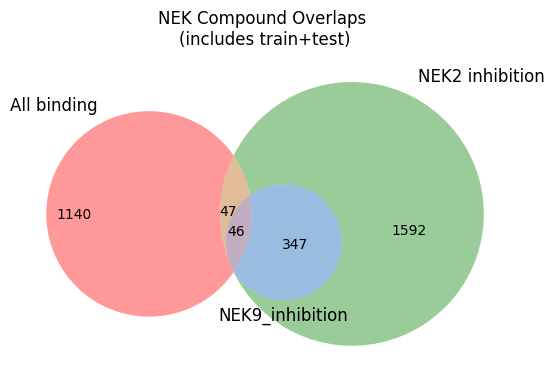

In [22]:
common_binding=common_unique_values(list(df_dict['NEK2_binding']['base_rdkit_smiles'].values),list(df_dict['NEK3_binding']['base_rdkit_smiles'].values),list(df_dict['NEK5_binding']['base_rdkit_smiles'].values),  list(df_dict['NEK9_binding']['base_rdkit_smiles'].values))
common_binding


common_inhibition=common_unique_values(list(df_dict['NEK2_inhibition']['base_rdkit_smiles'].values),list(df_dict['NEK9_inhibition']['base_rdkit_smiles'].values))

nek2inhib=set(df_dict['NEK2_inhibition']['base_rdkit_smiles'].values)
nek9inhib=set(df_dict['NEK9_inhibition']['base_rdkit_smiles'].values)
venn3([common_binding,nek2inhib, nek9inhib], set_labels=('All binding', 'NEK2 inhibition', 'NEK9_inhibition'))

plt.title('NEK Compound Overlaps \n(includes train+test)')
plt.savefig(f"NEK_venn.png", bbox_inches='tight')

plt.show()


In [24]:
neks

['NEK2_binding',
 'NEK2_inhibition',
 'NEK3_binding',
 'NEK5_binding',
 'NEK9_binding',
 'NEK9_inhibition']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

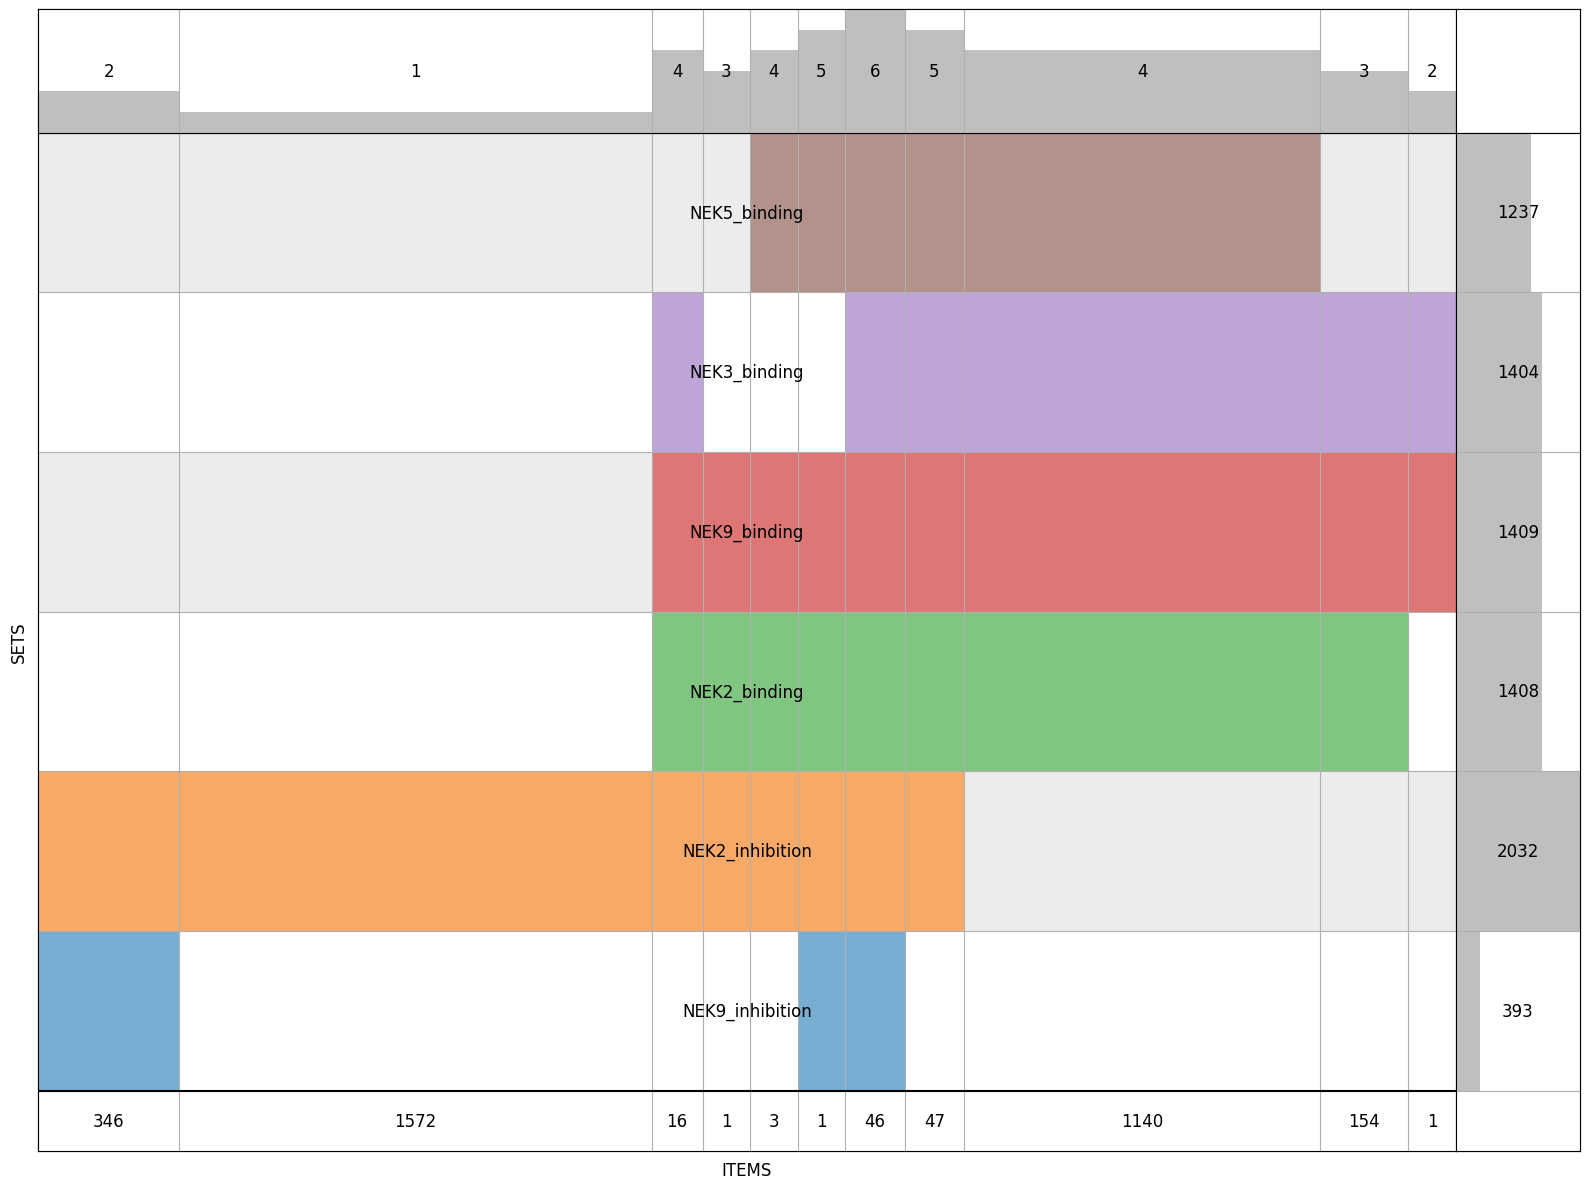

In [65]:
from supervenn import supervenn
nek_sets=[]
nek_labels=[]
for nek in neks: 
    this_nek = df_dict[nek] 
    nek_set = set(this_nek['base_rdkit_smiles'])
    nek_sets.append(nek_set)
    nek_labels.append(nek)
plt.figure(figsize=(16, 12))
supervenn(nek_sets, nek_labels,sets_ordering='minimize gaps', side_plots=True,widths_minmax_ratio=0.1, )
plt.title('Molecule Overlaps\n(Includes train+test)')
plt.tight_layout()
plt.savefig(f"NEK_supervenn.png", bbox_inches='tight')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

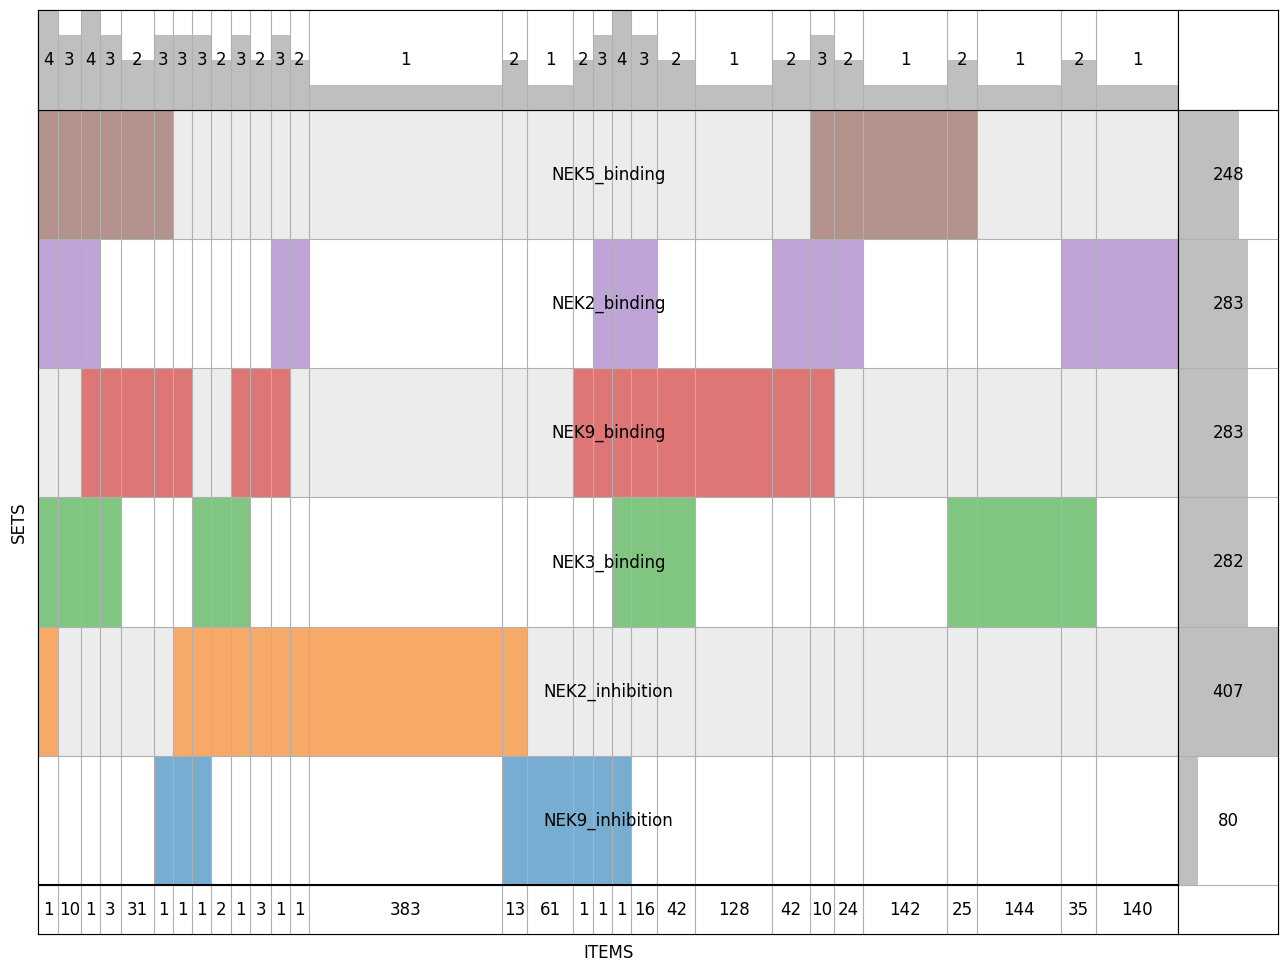

In [47]:

nek_test_sets=[]
nek_test_labels=[]
for nek in neks: 
    this_nek = df_dict[nek] 
    nek_test_set = set(this_nek[this_nek['subset']=='test']['base_rdkit_smiles'])
    nek_test_sets.append(nek_test_set)
    nek_test_labels.append(nek)
plt.figure(figsize=(16, 12))
supervenn(nek_test_sets, nek_test_labels,sets_ordering='minimize gaps', side_plots=True,widths_minmax_ratio=0.1)
plt.title('Molecule Overlaps\n(test set only)')
plt.savefig(f"NEK_supervenn_test.png", bbox_inches='tight')
plt.show()

In [68]:
248+12


260

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

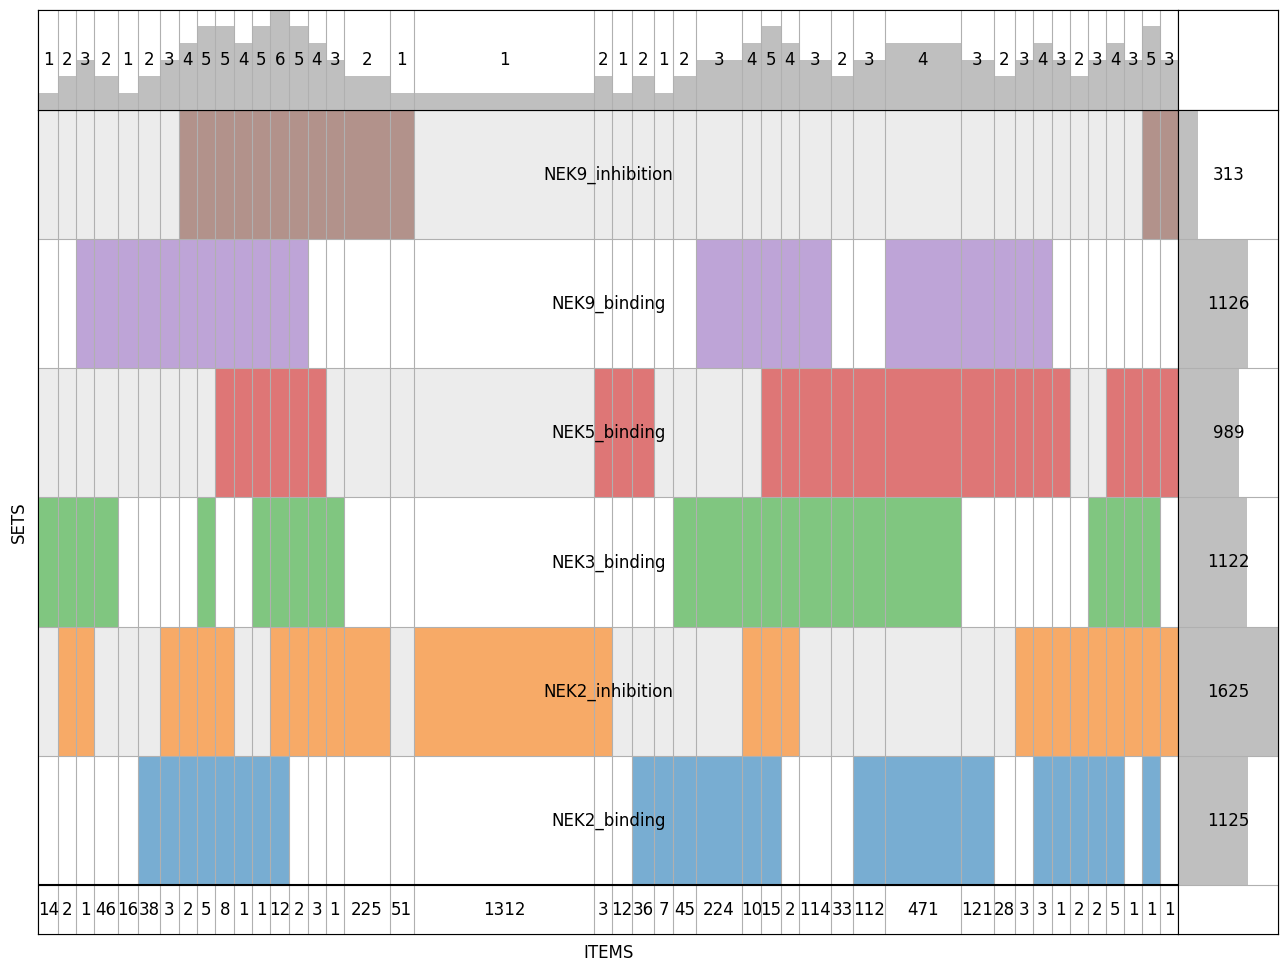

In [48]:
nek_train_sets=[]
nek_train_labels=[]
for nek in neks: 
    this_nek = df_dict[nek] 
    nek_train_set = set(this_nek[this_nek['subset']=='train']['base_rdkit_smiles'])
    nek_train_sets.append(nek_train_set)
    nek_train_labels.append(nek)
plt.figure(figsize=(16, 12))
supervenn(nek_train_sets, nek_train_labels, chunks_ordering='minimize gaps',side_plots=True,widths_minmax_ratio=0.1)
plt.title('Molecule Overlaps\n(train set only)')
plt.savefig(f"NEK_supervenn_train.png", bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

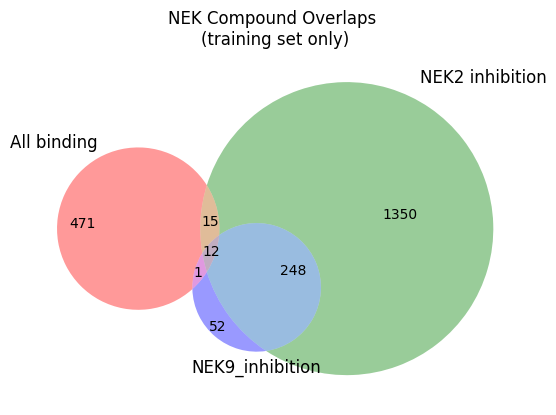

In [44]:
nek2_binding = df_dict['NEK2_binding']
nek3_binding = df_dict['NEK3_binding']
nek5_binding = df_dict['NEK5_binding']
nek9_binding = df_dict['NEK9_binding']
nek2_inhibition = df_dict['NEK2_inhibition']
nek9_inhibition = df_dict['NEK9_inhibition']
train_common_binding=common_unique_values(list(nek2_binding[nek2_binding['subset']=='train']['base_rdkit_smiles'].values),
                list(nek3_binding[nek3_binding['subset']=='train']['base_rdkit_smiles'].values),
                list(nek5_binding[nek5_binding['subset']=='train']['base_rdkit_smiles'].values), 
                list(nek9_binding[nek9_binding['subset']=='train']['base_rdkit_smiles'].values))


nek2inhib_train=set(nek2_inhibition[nek2_inhibition['subset']=='train']['base_rdkit_smiles'].values)
nek9inhib_train=set(nek9_inhibition[nek9_inhibition['subset']=='train']['base_rdkit_smiles'].values)
venn3([train_common_binding,nek2inhib_train,nek9inhib_train], set_labels=('All binding', 'NEK2 inhibition', 'NEK9_inhibition'))

plt.title('NEK Compound Overlaps \n(training set only)')
plt.savefig(f"NEK_venn_train_only.png", bbox_inches='tight')

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

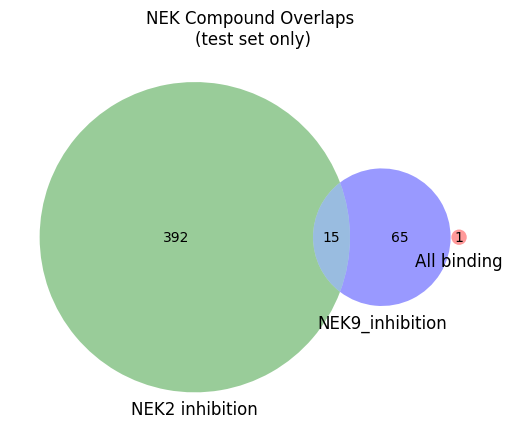

In [45]:
test_common_binding=common_unique_values(list(nek2_binding[nek2_binding['subset']=='test']['base_rdkit_smiles'].values),
                list(nek3_binding[nek3_binding['subset']=='test']['base_rdkit_smiles'].values),
                list(nek5_binding[nek5_binding['subset']=='test']['base_rdkit_smiles'].values), 
                list(nek9_binding[nek9_binding['subset']=='test']['base_rdkit_smiles'].values))


nek2inhib_test=set(nek2_inhibition[nek2_inhibition['subset']=='test']['base_rdkit_smiles'].values)
nek9inhib_test=set(nek9_inhibition[nek9_inhibition['subset']=='test']['base_rdkit_smiles'].values)
venn3([test_common_binding,nek2inhib_test,nek9inhib_test], set_labels=('All binding', 'NEK2 inhibition', 'NEK9_inhibition'))

plt.title('NEK Compound Overlaps \n(test set only)')
plt.savefig(f"NEK_venn_test_only.png", bbox_inches='tight')

plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

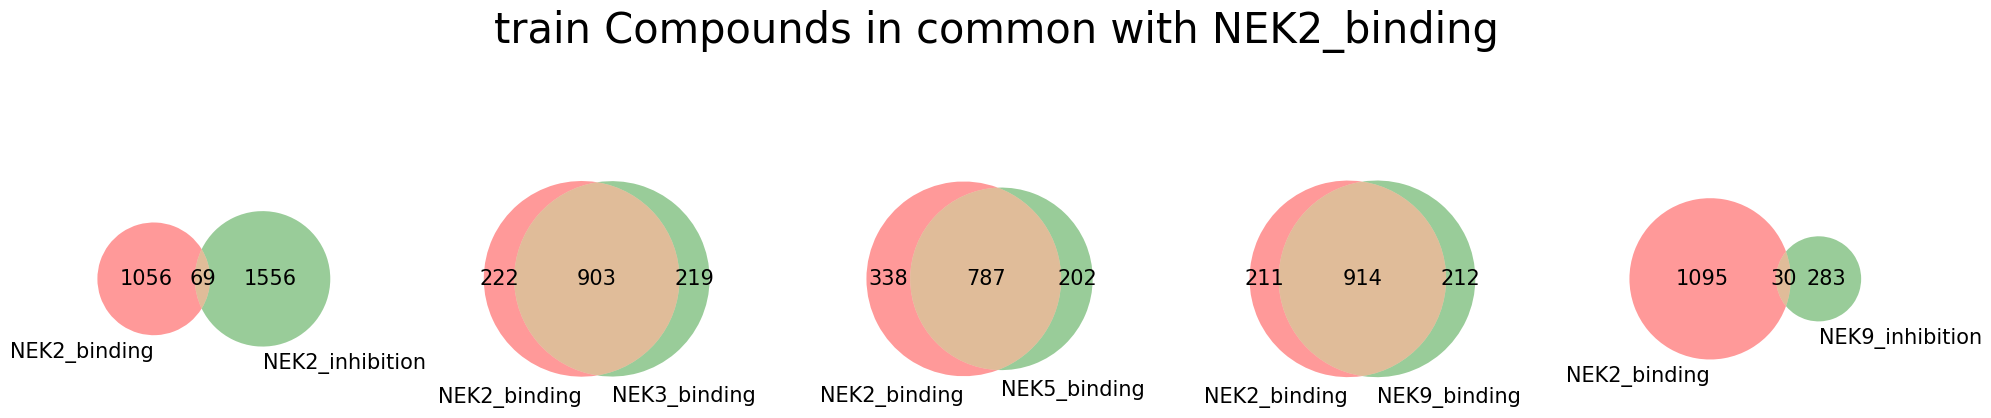

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

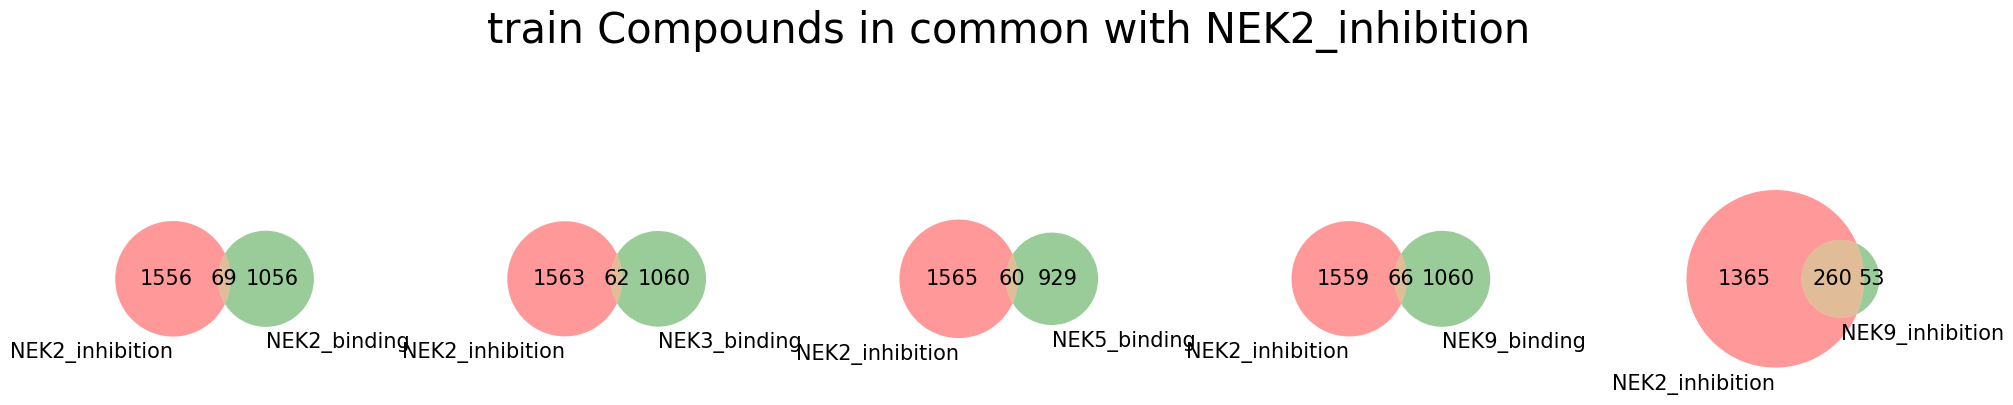

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

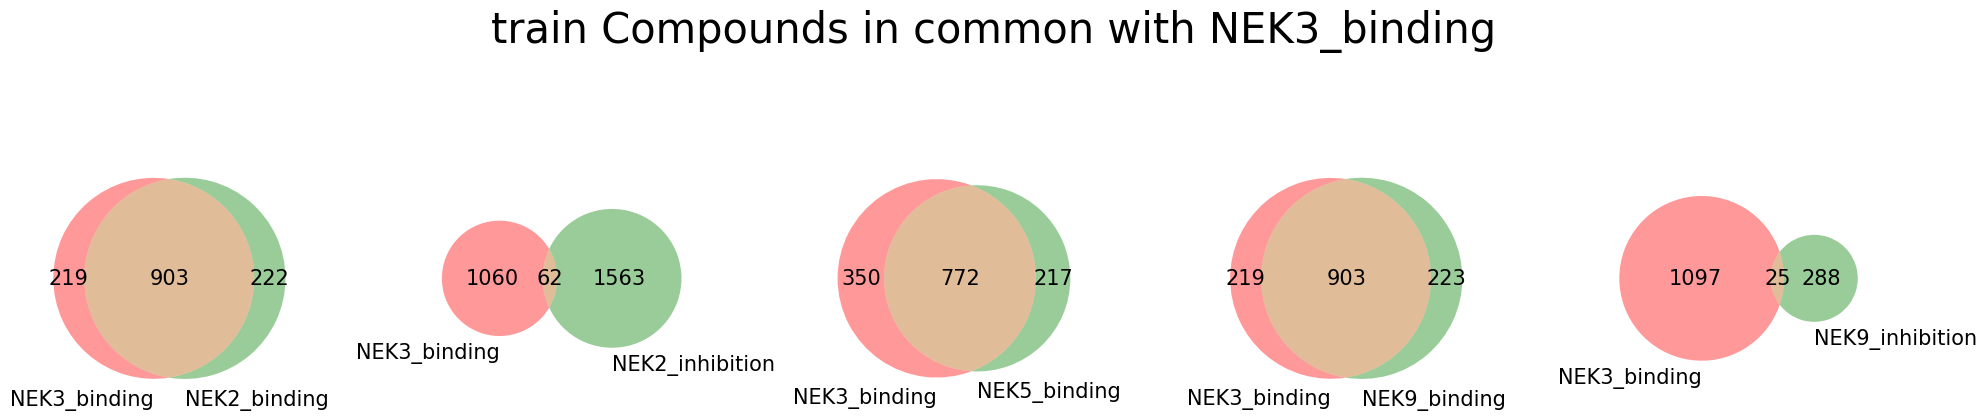

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

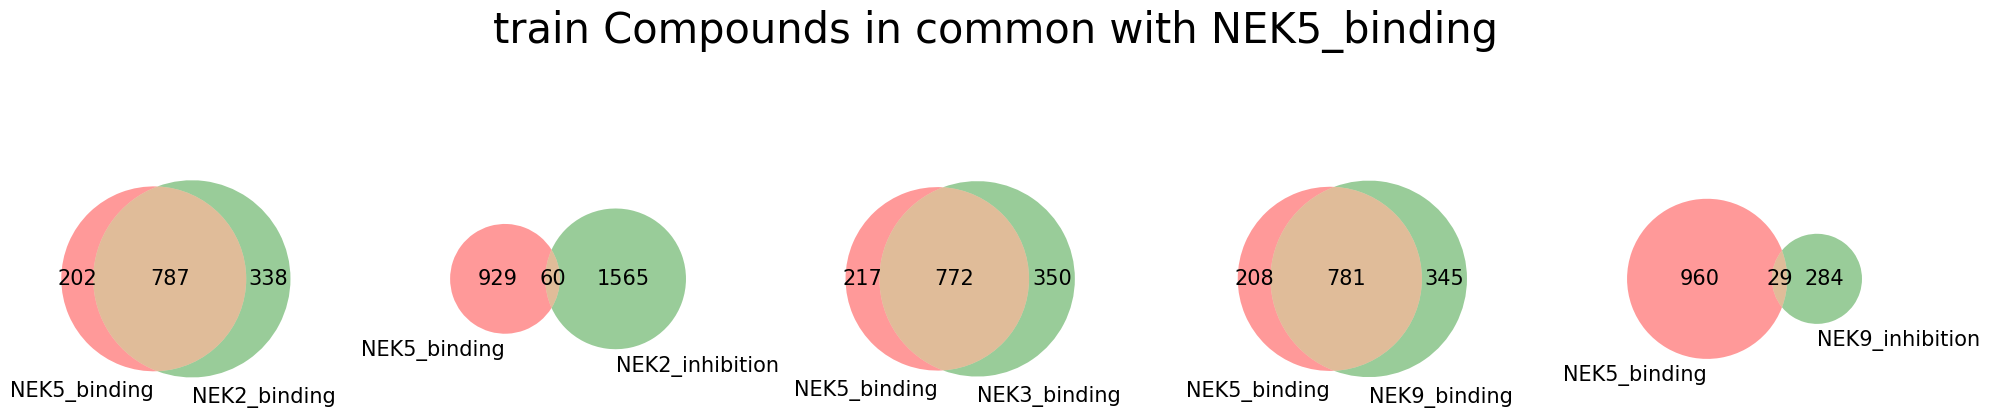

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

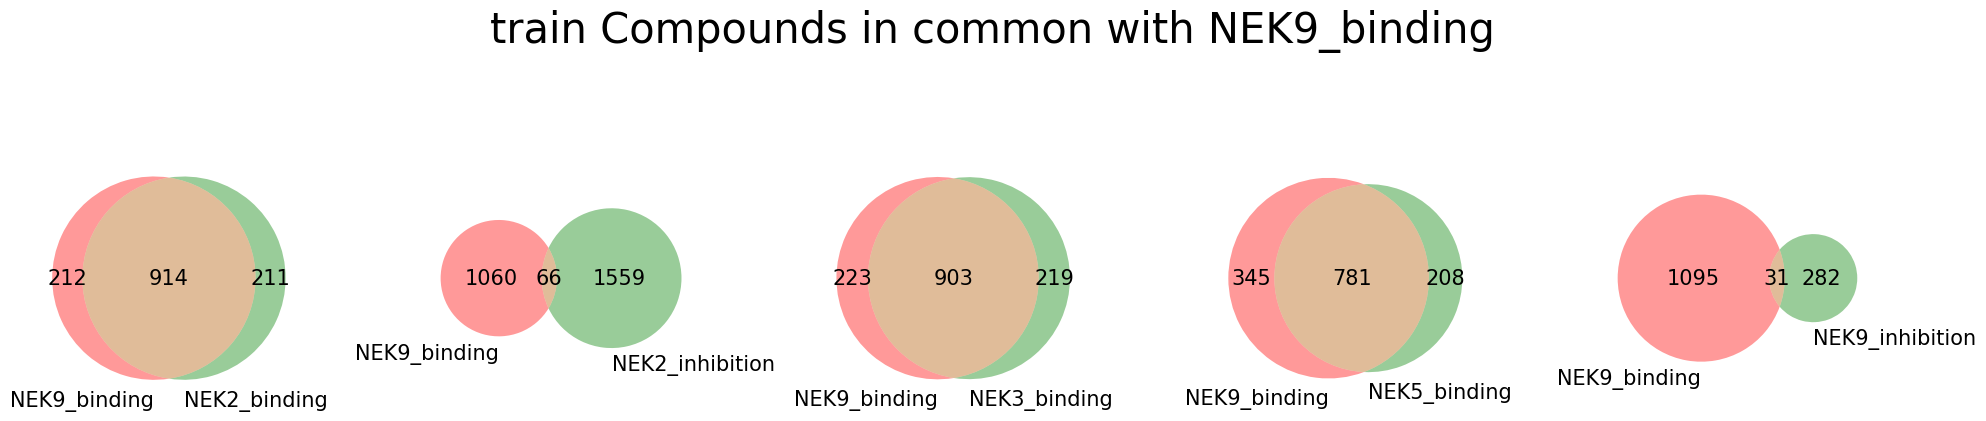

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

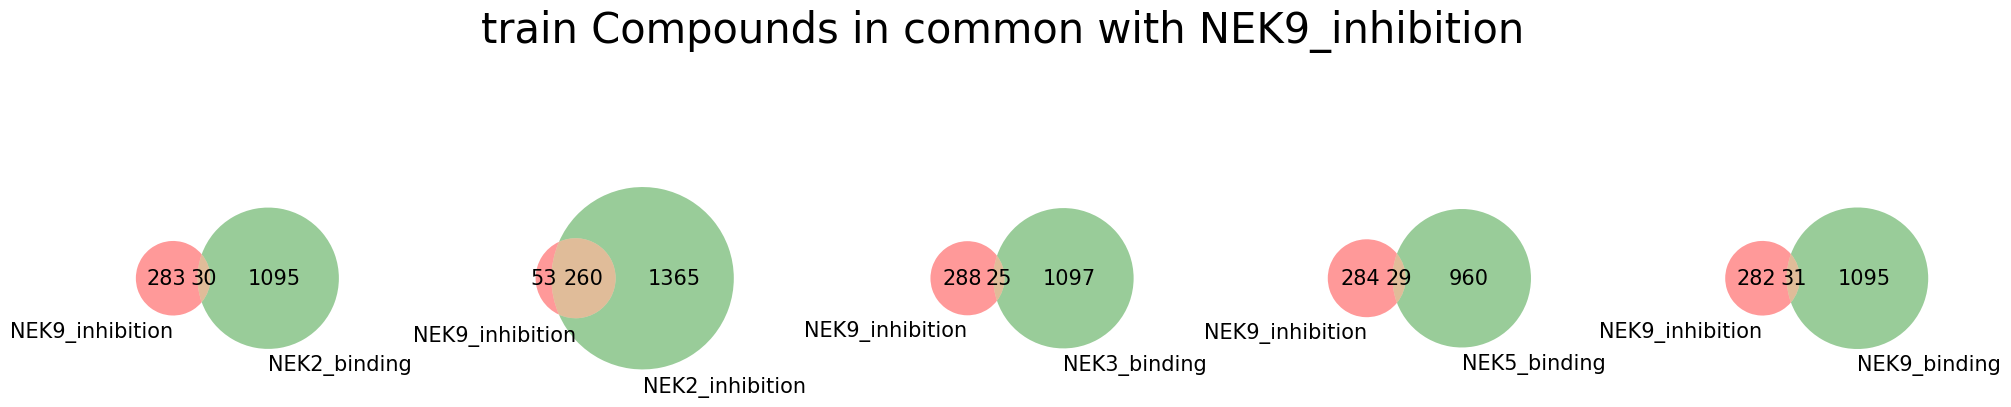

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

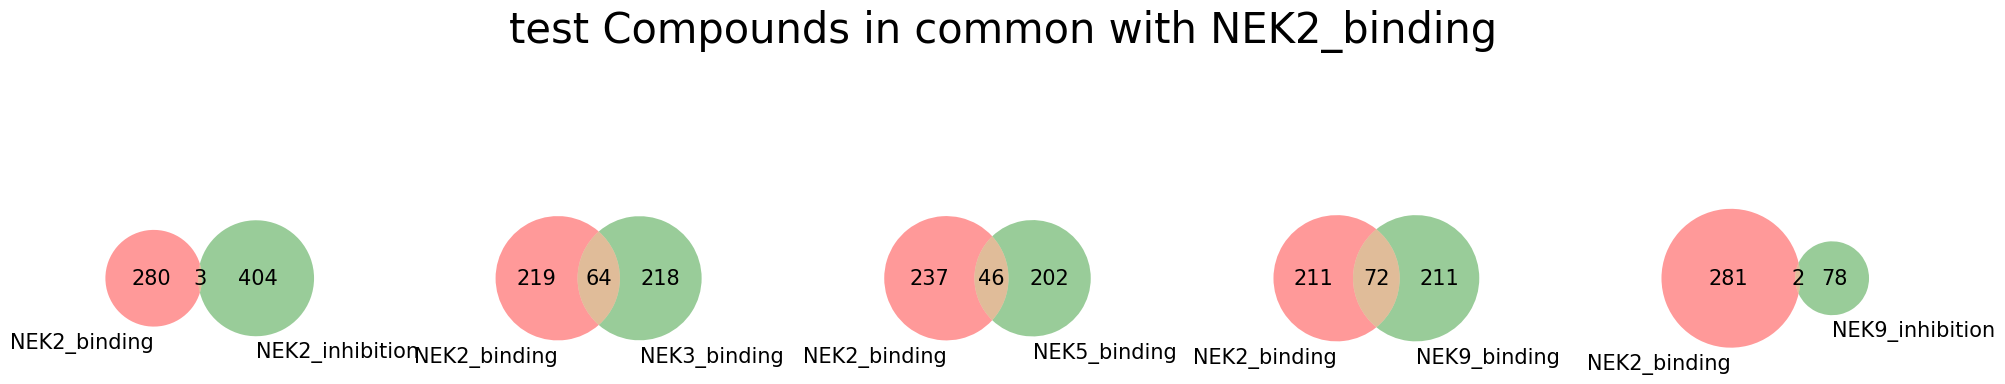

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

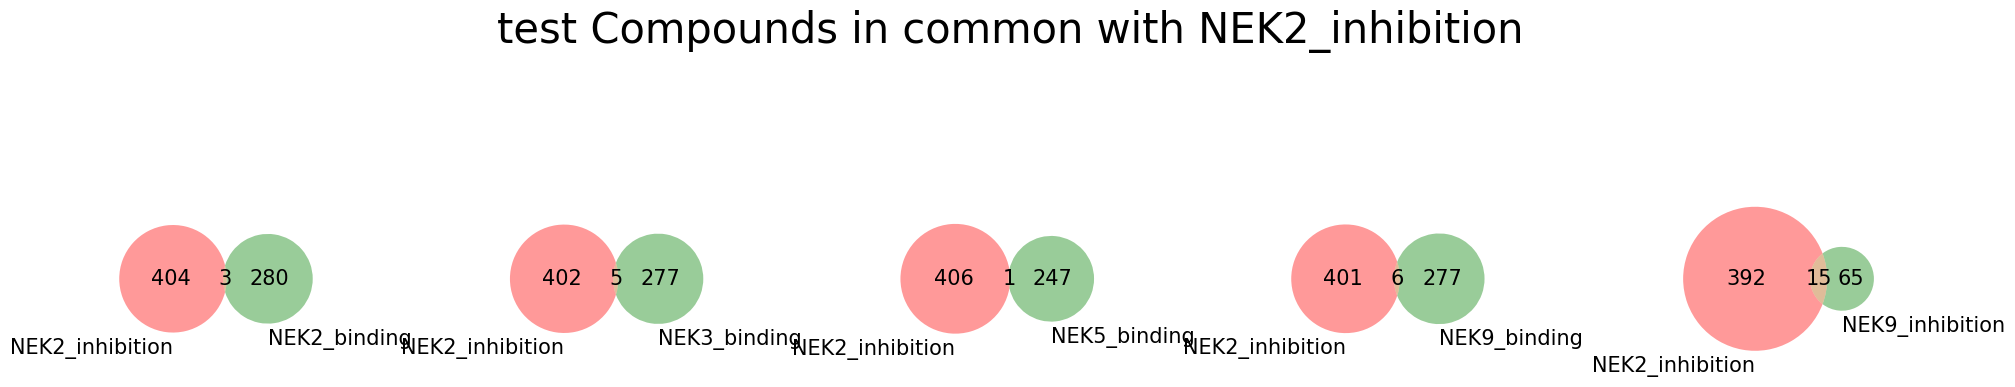

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

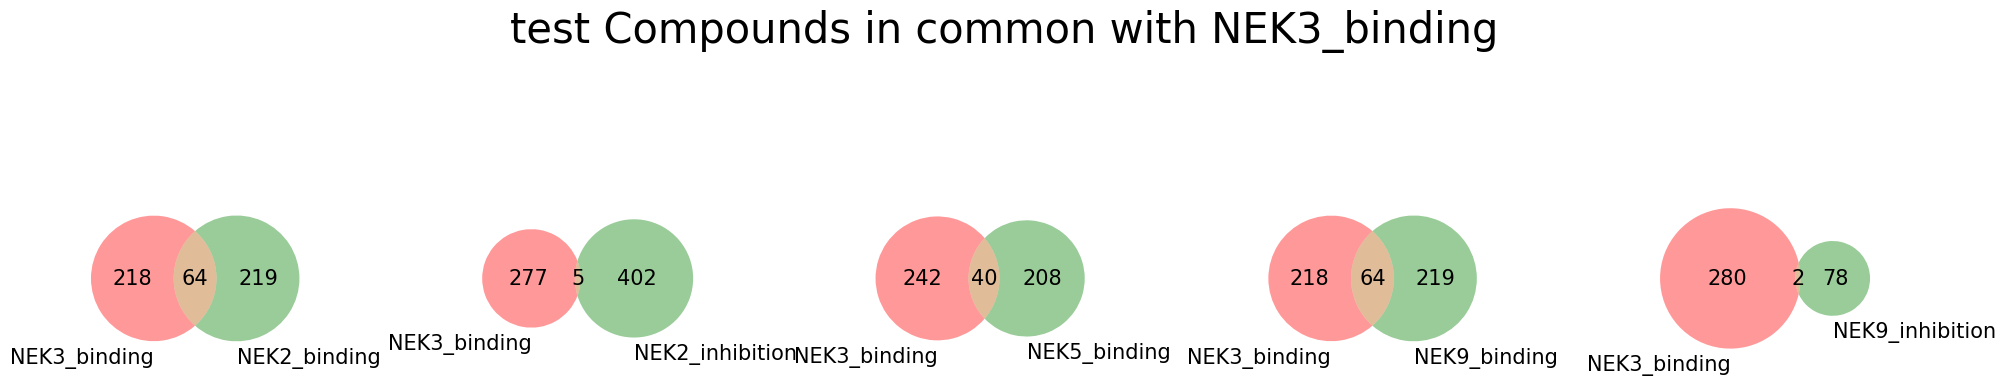

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

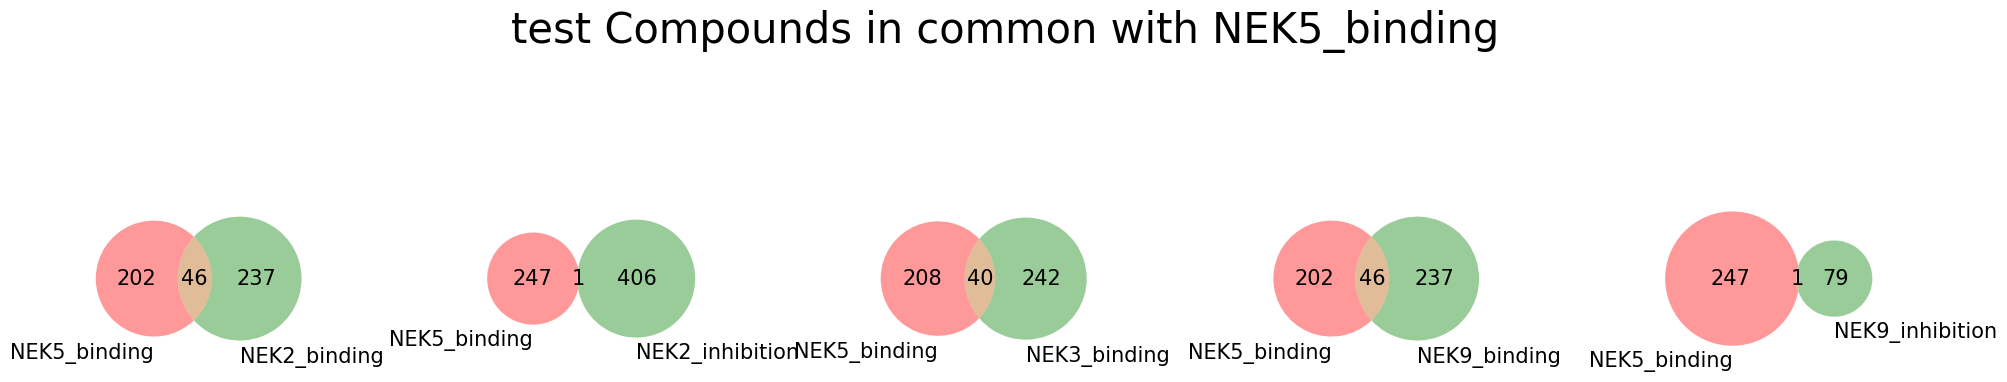

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

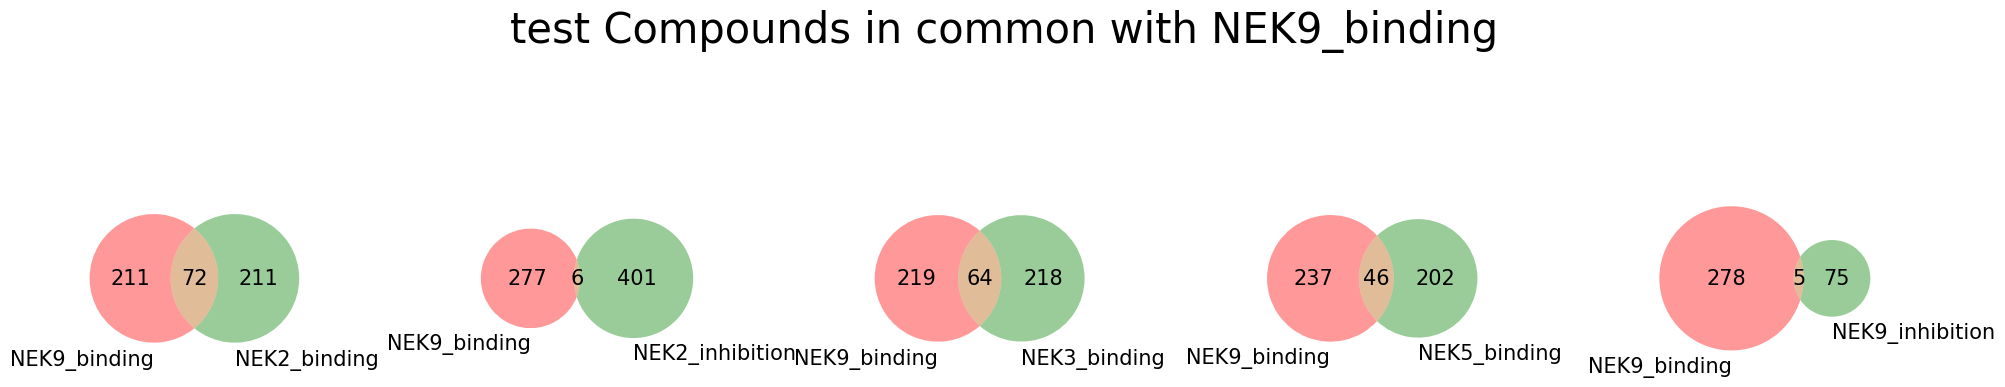

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

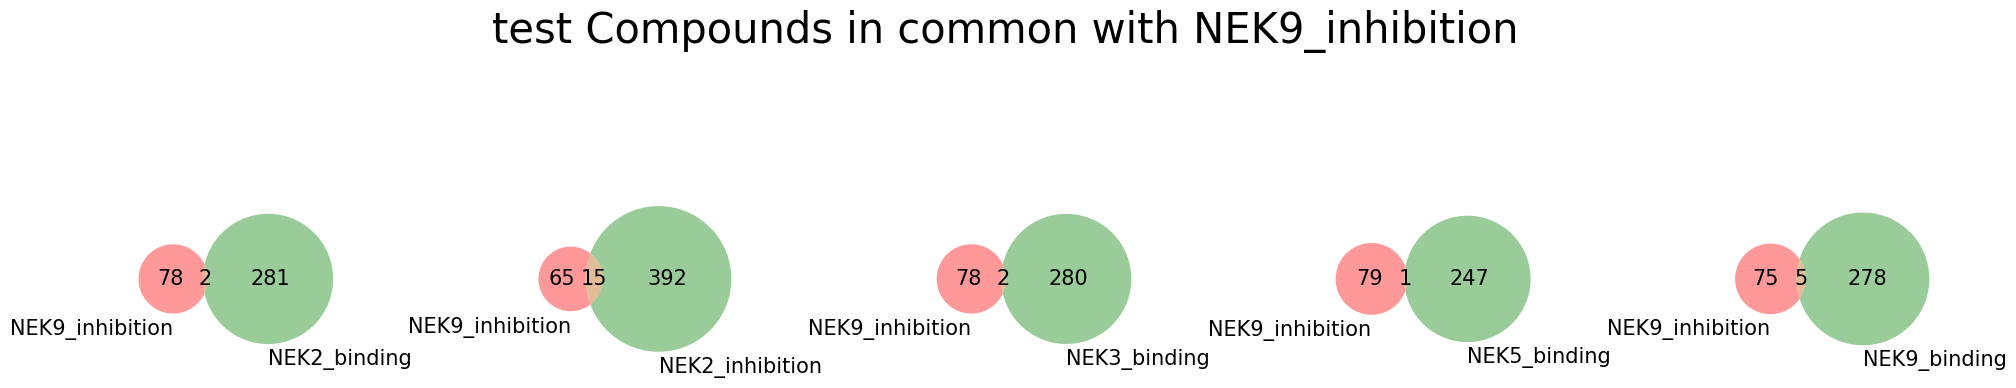

In [70]:
num_neks = len(neks)
for traintest in ['train', 'test']: 
    for i in range(num_neks):
        curr_nek = neks[i]
        combos_to_plot = [(curr_nek, neks[j]) for j in range(num_neks) if j != i] 
        
        num_inner_plots = len(combos_to_plot) 
        if num_inner_plots == 0:
            continue 
        fig, axs = plt.subplots(1, num_inner_plots, figsize=(20, 8))
        if num_inner_plots == 1:
            axs = [axs] 
    
        fig.suptitle(f'{traintest} Compounds in common with {curr_nek}', fontsize=30, y=0.8)
    
        for inner_index, (nek1, nek2) in enumerate(combos_to_plot):
            this_nek = df_dict[nek1]
            that_nek = df_dict[nek2]
            
            set1 = set(this_nek[this_nek['subset']==traintest]['base_rdkit_smiles']) 
            set2 = set(that_nek[that_nek['subset']==traintest]['base_rdkit_smiles']) 
            out = venn2([set1, set2], (nek1, nek2), ax=axs[inner_index]) 
    
            for text in out.set_labels:
                text.set_fontsize(15)
            for text in out.subset_labels:
                text.set_fontsize(15)
    
        plt.tight_layout()
        plt.savefig(f'individual_venn/{curr_nek}_{traintest}_cmpds.png')
        plt.show()